In [25]:
import numpy as np
import pandas as pd

In [26]:
SurvivedDf=pd.read_csv('titanic/gender_submission.csv')
TrainDf=pd.read_csv('titanic/train.csv')
TestDf=pd.read_csv('titanic/test.csv')

In [27]:
TrainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
TestDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
SurvivedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [30]:
SurvivedDf.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [31]:
TrainDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
TestDf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
TrainDf.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
TestDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
SurvivedDf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [36]:
#Visualisation

In [37]:
import matplotlib.pyplot as plt

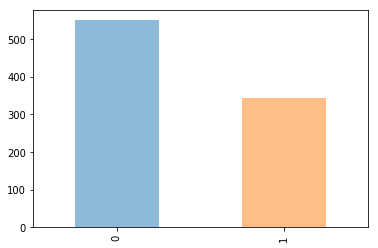

In [38]:
TrainDf.Survived.value_counts().plot(kind="bar",alpha=0.5)

Text(0.5,1,'Survived according to age')

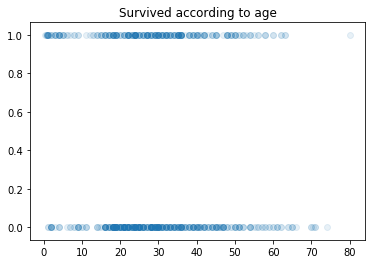

In [39]:
plt.scatter(TrainDf.Age,TrainDf.Survived,alpha=0.1)
plt.title("Survived according to age")

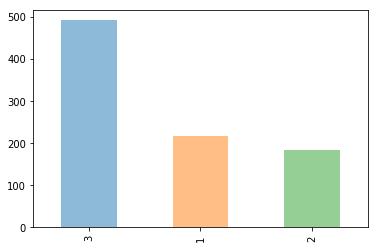

In [40]:
TrainDf.Pclass.value_counts().plot(kind='bar',alpha=0.5)


In [44]:
def bar_charts(feature):
    survived=TrainDf[TrainDf['Survived']==1][feature].value_counts()
    dead=TrainDf[TrainDf['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

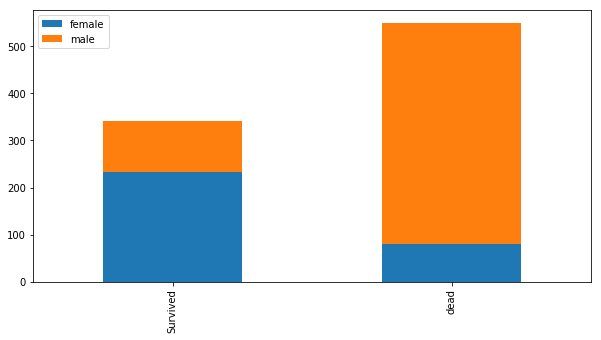

In [46]:
bar_charts('Sex')

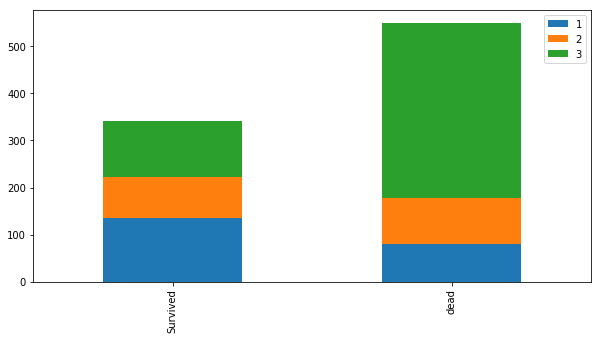

In [47]:
bar_charts('Pclass')

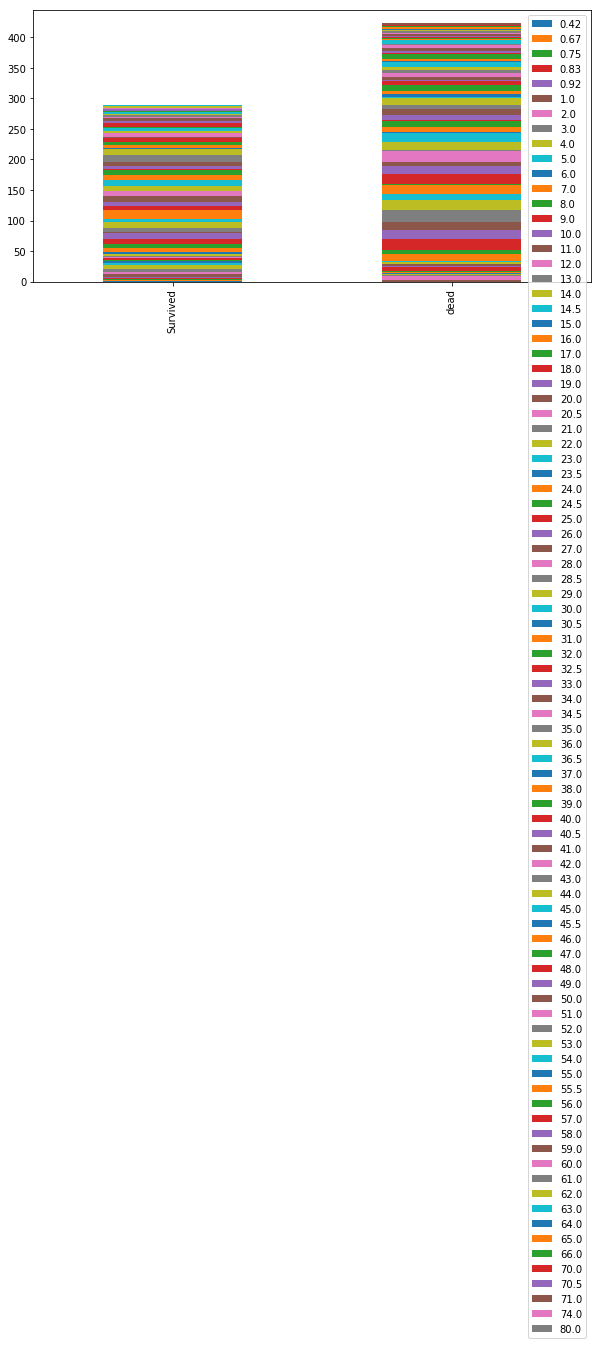

In [49]:
bar_charts('Age')

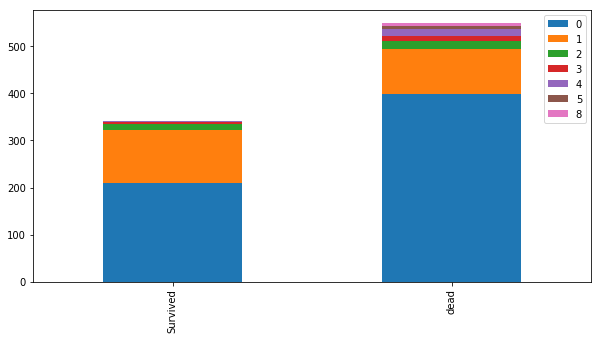

In [50]:
bar_charts('SibSp')

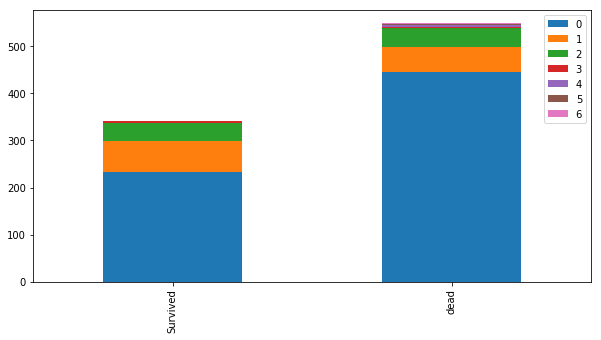

In [51]:
bar_charts('Parch')

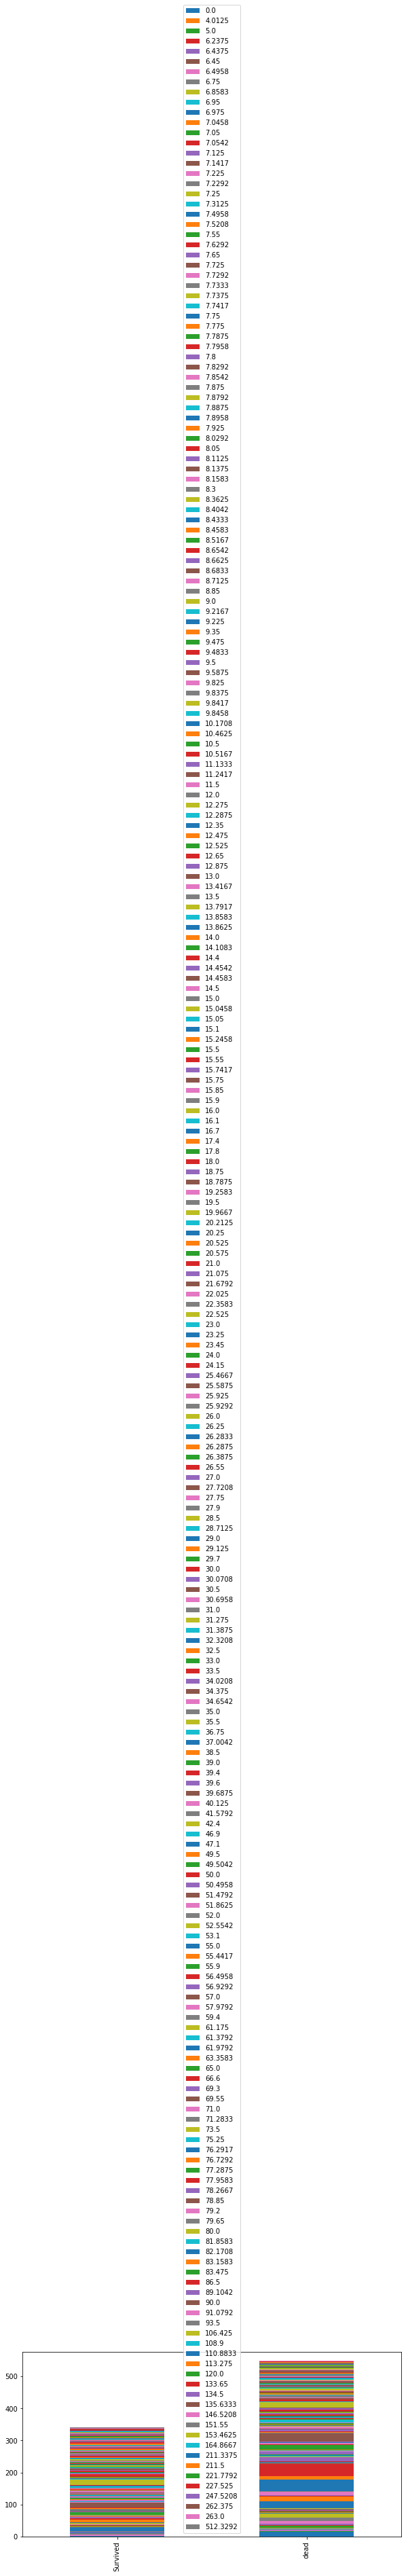

In [52]:
bar_charts('Fare')

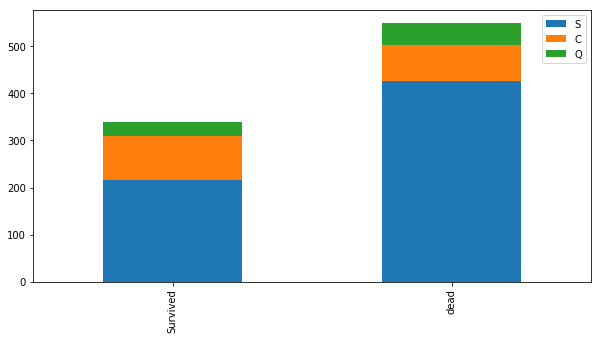

In [55]:
bar_charts('Embarked')

In [53]:
#here through visualisation we see that certain trends that are seen in this dataset are followed in the dataset

In [71]:
import pandas as pd
import python_utils as utils
from sklearn import linear_model

In [74]:
target=TrainDf["Survived"].values
features=TrainDf[["Pclass","Age","Sex","SibSp","Parch"]].values
classifier=linear_model.LogisticRegression()
classifier_=classifier.fit(features,target)

ValueError: could not convert string to float: 'male'